 """Ecommerce shipping prediction is the process of estimating the wheteher the product reached on time. which is  based on various factors such as the origin and destination of the package, the shipping method selected by the customer, the carrier used for shipping, and any potential delays or issues that may arise during the shipping process.
Machine learning models can be used to make accurate predictions about shipping times based on historical data and real-time updates from carriers. These models may take into account factors such as weather conditions, traffic, and other external factors that can impact delivery times.
Over All Ecommerce shipping prediction is an important tool for ecommerce businesses that want to provide accurate delivery estimates to their customers and improve their overall customer experience."""


# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Loading Data

In [2]:

data = pd.read_csv(r"F:\(---------PROJECTS--------)\------------SMARTINTERNZ\Data\Train.csv")
data.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [25]:
min(data['Customer_care_calls'])

2

# Check data

In [3]:
data.shape

(10999, 12)

In [3]:
data.info() #No null vallues found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [16]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,1.833167,0.998454,4.054459,2.990545,210.196836,3.567597,0.604600,0.495863,13.373216,3634.016729,0.596691
std,3175.28214,1.343823,0.567099,1.141490,1.413603,48.063272,1.522860,0.641464,0.500006,16.205527,1635.377251,0.490584
min,1.00000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,2750.50000,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000,4.000000,1839.500000,0.000000
50%,5500.00000,1.000000,1.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,8249.50000,3.000000,1.000000,5.000000,4.000000,251.000000,4.000000,1.000000,1.000000,10.000000,5050.000000,1.000000
max,10999.00000,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


checking data balance using output feature/ dependent variable classes as it is categorical, Data is balanced

In [4]:
len(data[data['Reached.on.Time_Y.N']==1]['Reached.on.Time_Y.N'])

6563

In [5]:
len(data[data['Reached.on.Time_Y.N']==0]['Reached.on.Time_Y.N'])

4436

# Data Analysis

In [14]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

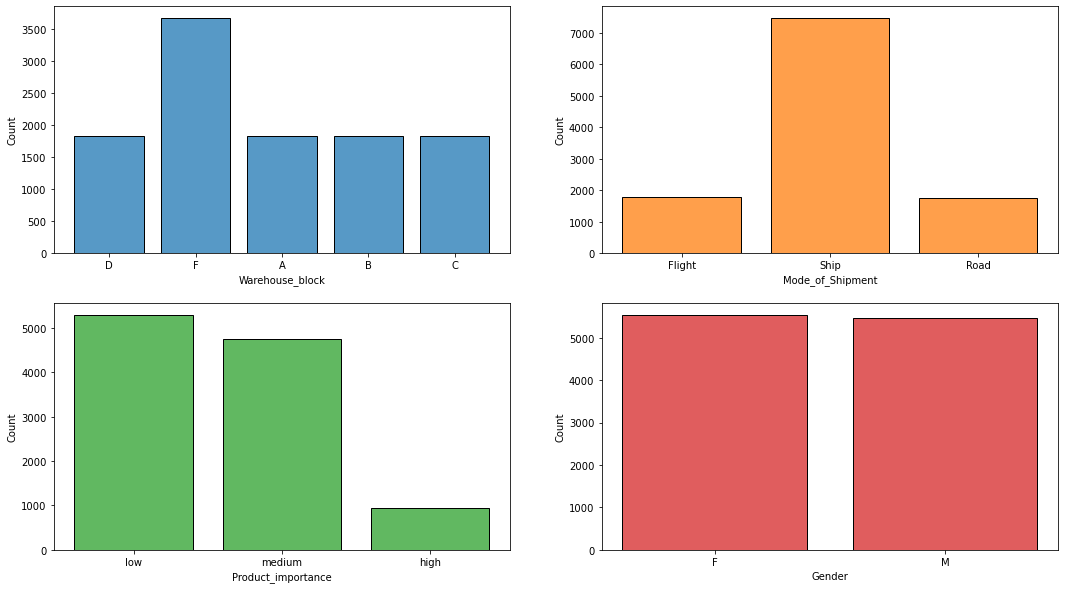

In [16]:
# Display value distributions
plt.figure(figsize=(18, 10))
colors = sns.color_palette()
num_features = data.select_dtypes('object').columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 2, i+1)
    sns.histplot(data[num],color=colors[i],shrink=0.8)
    
plt.show()

In [20]:
num_features

array(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype=object)

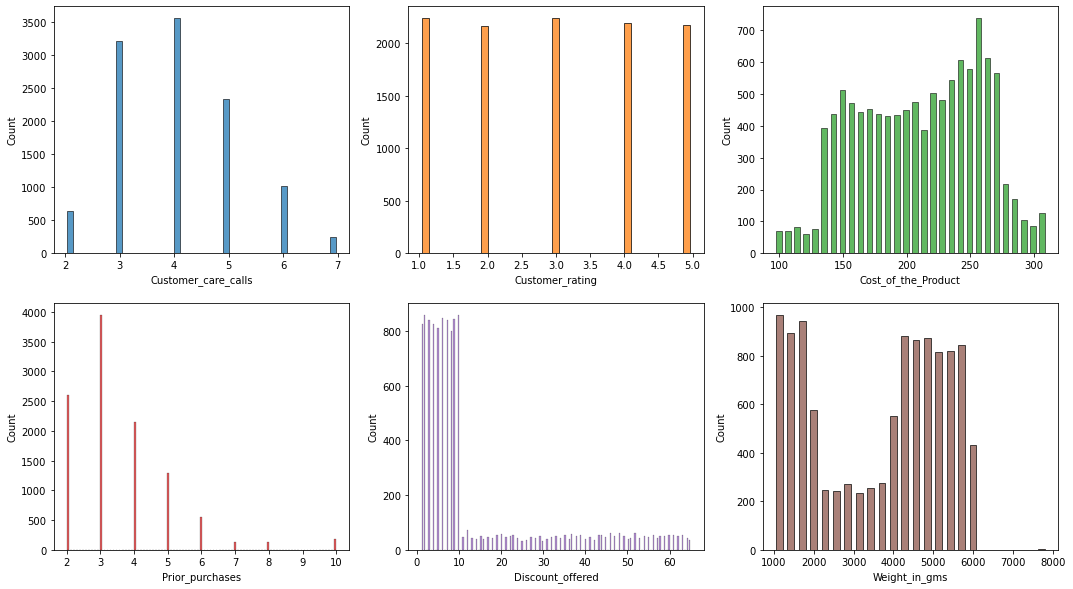

In [22]:
# Display value distributions
plt.figure(figsize=(18, 10))
colors = sns.color_palette()
num_features = data.select_dtypes('number').drop(columns=['ID','Reached.on.Time_Y.N']).columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 3, i+1)
    sns.histplot(data[num],color=colors[i],shrink=0.6)
    
plt.show()

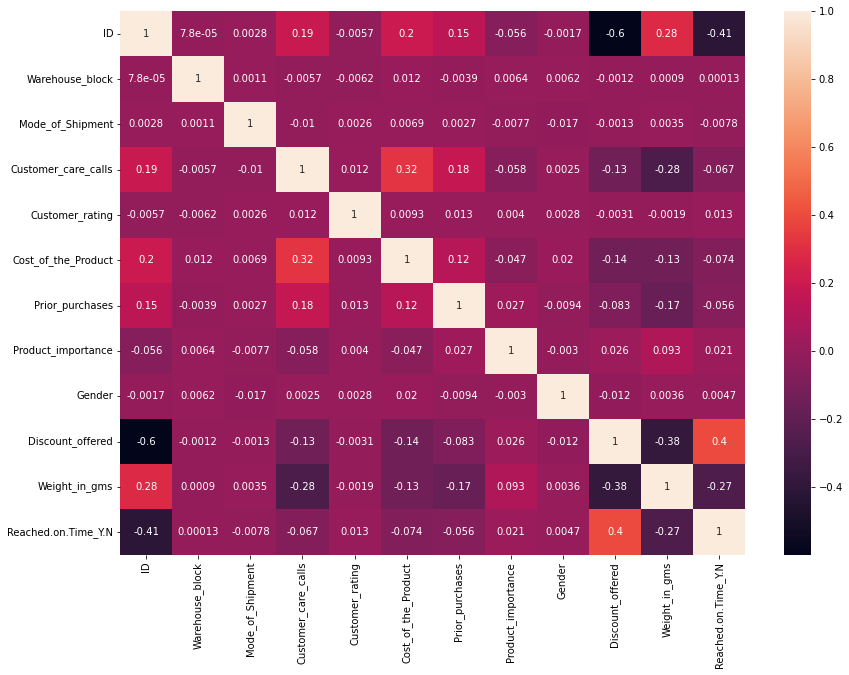

In [33]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Label mapping categorical variables

In [3]:
label_map={}
for i in data.columns:
    if str(data[i].dtype) == 'object':
        temp={}
        cats=data[i].unique()
        for index in range(len(cats)):
            temp[cats[index]]=index
        label_map[i]=temp
        #labeling
        data[i]=data[i].map(temp)
label_map

{'Warehouse_block': {'D': 0, 'F': 1, 'A': 2, 'B': 3, 'C': 4},
 'Mode_of_Shipment': {'Flight': 0, 'Ship': 1, 'Road': 2},
 'Product_importance': {'low': 0, 'medium': 1, 'high': 2},
 'Gender': {'F': 0, 'M': 1}}

In [11]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,0,0,4,2,177,3,0,0,44,1233,1
1,2,1,0,4,5,216,2,0,1,59,3088,1
2,3,2,0,2,2,183,4,0,1,48,3374,1
3,4,3,0,3,3,176,4,1,1,10,1177,1
4,5,4,0,2,2,184,3,1,0,46,2484,1


# Checking for outliers

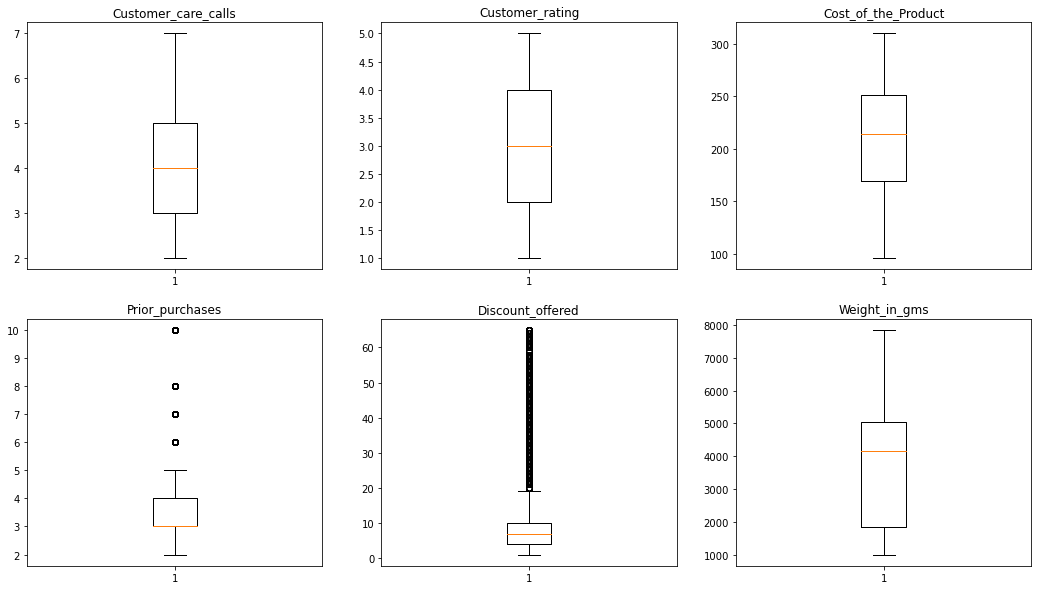

In [6]:
c=0
plt.figure(figsize=(18, 10))
for i in data.drop(columns=[
                            'Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Reached.on.Time_Y.N','ID'
                           ]).columns:
    if str(data[i].dtype)=='object':
        continueZ
    plt.subplot(2, 3, c+1)
    plt.boxplot(data[i])
    plt.title(i)
    c+=1
plt.show()

In [41]:
def check_outliers(arr):
    Q1 = np.percentile(arr, 25,interpolation = 'midpoint')
    Q3 = np.percentile(arr, 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    #Above Upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(arr>=upper)
    print(' '*3,len(upper_array[upper_array == True]),'are over the upper bound:',upper)

    #Below Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(arr<=lower)
    print(' '*3,len(lower_array[lower_array == True]),'are less than the lower bound:',lower,'\n')

for i in data.drop(columns=[
                            'Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Reached.on.Time_Y.N','ID'
                           ]).columns:
    if str(data[i].dtype)=='object':
        continue
    print(i)
    check_outliers(data[i])

Customer_care_calls
    0 are over the upper bound: 8.0
    0 are less than the lower bound: 0.0 

Customer_rating
    0 are over the upper bound: 7.0
    0 are less than the lower bound: -1.0 

Cost_of_the_Product
    0 are over the upper bound: 374.0
    0 are less than the lower bound: 46.0 

Prior_purchases
    1003 are over the upper bound: 5.5
    0 are less than the lower bound: 1.5 

Discount_offered
    2262 are over the upper bound: 19.0
    0 are less than the lower bound: -5.0 

Weight_in_gms
    0 are over the upper bound: 9865.75
    0 are less than the lower bound: -2976.25 



# Normalization

As data is having outliers we normalize the data after splitting to train and test variables

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
                                        data.drop(columns=['ID','Reached.on.Time_Y.N']),
                                        data['Reached.on.Time_Y.N'],
                                        random_state=1234,test_size = 0.20,
                                        shuffle=True
                                        )
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8799, 10)
(2200, 10)
(8799,)
(2200,)


In [7]:
Data_normalizer_p = Normalizer(norm='l1')
Data_normalizer_d = Normalizer(norm='l1')
x_train['Prior_purchases'] = Data_normalizer_p.fit_transform(x_train['Prior_purchases'].values.reshape(-1,1))
x_train['Discount_offered'] = Data_normalizer_d.fit_transform(x_train['Discount_offered'].values.reshape(-1,1))

In [20]:
Data_normal`izer = Normalizer(norm='l1').fit(x_train)
x_train_normalized = Data_normalizer.transform(x_train)
x_test_normalized = Data_normalizer.transform(x_test)

# Training and evaluating models

In [10]:
def models_eval_mm(x_train,y_train,x_test,y_test):
    lg = LogisticRegression(random_state=1234)
    lg.fit(x_train,y_train)
    print('--Logistic Regression')
    print('Train Score:',lg.score(x_train,y_train))
    print('Test Score:',lg.score(x_test,y_test))
    print()
    
    lcv = LogisticRegressionCV(Cs= 10, max_iter= 60,random_state=1234)
    lcv.fit(x_train,y_train)
    print('--Logistic Regression CV')
    print('Train Score:',lcv.score(x_train,y_train))
    print('Test Score:',lcv.score(x_test,y_test))
    print()
    
    print('--XGBoost')
    xgb = XGBClassifier(colsample_bytree= 0.8, gamma= 2.0, max_depth= 4, min_child_weight= 10,random_state=1234) 
    xgb.fit(x_train,y_train)
    print('Train Score:',xgb.score(x_train,y_train))
    print('Test Score:',xgb.score(x_test,y_test))
    print()
    
    print('--Ridge Classifier')
    rg = RidgeClassifier(random_state=1234)
    rg.fit(x_train,y_train)
    print('Train Score:',rg.score(x_train,y_train))
    print('Test Score:',rg.score(x_test,y_test))
    print()
    
    print('--KNN')
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    print('Train Score:',knn.score(x_train,y_train))
    print('Test Score:',knn.score(x_test,y_test))
    print()
    
    print('--Random Forest')
    rf = RandomForestClassifier(criterion= 'entropy', max_depth= 7, n_estimators= 200,random_state=1234)
    rf.fit(x_train,y_train)
    print('Train Score:',rf.score(x_train,y_train))
    print('Test Score:',rf.score(x_test,y_test))
    print()
    
    print('--SVM classifier')
    svc = svm.SVC(random_state=1234,kernel='rbf',C= 10, gamma= 5 , tol = 1e-2,verbose = 1)
    svc.fit(x_train,y_train)
    print('Train Score:',svc.score(x_train,y_train))
    print('Test Score:',svc.score(x_test,y_test))
    print()
    
    return lg,lcv,xgb,rg,knn,rf,svc

In [11]:

lg,lcv,xgb,rg,knn,rf,svc = models_eval_mm(x_train,y_train,x_test,y_test)

C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

--Logistic Regression
Train Score: 0.6364359586316627
Test Score: 0.5927272727272728



C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

--Logistic Regression CV
Train Score: 0.6407546312080918
Test Score: 0.6045454545454545

--XGBoost
Train Score: 0.7239459029435164
Test Score: 0.6718181818181819

--Ridge Classifier
Train Score: 0.6358677122400272
Test Score: 0.6263636363636363

--KNN
Train Score: 0.7845209682918514
Test Score: 0.6577272727272727

--Random Forest
Train Score: 0.7190589839754518
Test Score: 0.6722727272727272

--SVM classifier
[LibSVM]Train Score: 1.0
Test Score: 0.5927272727272728



In [9]:

lg,lcv,xgb,rg,knn,rf,svc = models_eval_mm(x_train,y_train,x_test,y_test)

C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

--Logistic Regression
Train Score: 0.6364359586316627
Test Score: 0.5927272727272728



C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

--Logistic Regression CV
Train Score: 0.6395044891464939
Test Score: 0.6272727272727273

--XGBoost
Train Score: 0.8860097738379361
Test Score: 0.6554545454545454

--Ridge Classifier
Train Score: 0.6358677122400272
Test Score: 0.6263636363636363

--KNN
Train Score: 0.7845209682918514
Test Score: 0.6577272727272727

--Random Forest
Train Score: 1.0
Test Score: 0.65

--SVM classifier
Train Score: 0.6653028753267417
Test Score: 0.6477272727272727



# Hyperparamter optimisation for SVM

In [ ]:
svc = svm.SVC(random_state=1234)
params = {
    'kernel' : ['poly', 'rbf'],
            'C': [ 10, 13], 
              'gamma': [4,5],
    'tol':[1e-1,1e-2,1e-3]
        }
fitmodel = GridSearchCV(svc, param_grid=params, cv=5, refit=True, scoring="accuracy", n_jobs=-1, verbose=3)
fitmodel.fit(x_train_normalized, y_train)
print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)

# SVC(C=10, gamma=1, random_state=1234) {'C': 10, 'gamma': 1, 'kernel': 'rbf'} 0.6657575326890279
# SVC(C=6, gamma=2, random_state=1234) {'C': 6, 'gamma': 2, 'kernel': 'rbf'} 0.6659845470050132

In [ ]:
#svc = svm.SVC(random_state=1234,kernel='rbf',C= 6, gamma= 4) 0.6648482782134334 0.6672727272727272
#svc = svm.SVC(random_state=1234,kernel='rbf',C= 5, gamma= 5) 0.6640527332651438 0.6686363636363636
#svc = svm.SVC(random_state=1234,kernel='rbf',C= 10, gamma= 5, verbose = 3) 0.6648482782134334 0.6695454545454546
#svc = svm.SVC(random_state=1234,kernel='rbf',C= 10, gamma= 5 , tol = 1e-2, verbose = 1) 0.6648482782134334 0.6704545454545454
svc = svm.SVC(random_state=1234,kernel='rbf',C= 10, gamma= 5 , tol = 1e-2,verbose = 1)
svc.fit(x_train_normalized, y_train)
print('train score',svc.score(x_train_normalized,y_train))
print('test score',svc.score(x_test_normalized,y_test))

# Hyperparameter optimisation for XGboost

In [ ]:
params = {
        'min_child_weight': [10,20],
        'gamma': [1.5, 2.0, 2.5],
        'colsample_bytree': [0.6, 0.8, 0.9],
        'max_depth': [4,5,6]
        }
xgb = XGBClassifier(learning_rate=0.5, n_estimators=100, objective='binary:logistic', nthread=3)
fitmodel = GridSearchCV(xgb, param_grid=params, cv=5, refit=True, scoring="accuracy", n_jobs=-1, verbose=3)
fitmodel.fit(x_train_normalized, y_train)
print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)

# {'colsample_bytree': 0.8, 'gamma': 2.0, 'max_depth': 4, 'min_child_weight': 10} 0.6608713628611298

# Random Forest Hyperparameter optimisation

In [ ]:
# Plug in appropriate max_depth and random_state parameters
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [200,300,500], 
    'criterion': ['entropy','gini'],
    'max_depth': [7,8,60,80,100],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_cv= GridSearchCV(rf,rf_param_grid,cv=7,scoring="accuracy", n_jobs=-1, verbose=3)
rf_cv.fit(x_train_normalized,y_train)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

#Best Score:0.6849642004773271
#Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}

In [34]:
# DEPLOYING model
rf = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators= 80)

rf.fit(x_train_normalized,y_train)
print('train',rf.score(x_train_normalized,y_train))
print('test',rf.score(x_test_normalized,y_test))

#train 0.7034890328446415
#test 0.6872727272727273

train 0.7475849528355495
test 0.6777272727272727


# Logistic regression hyperparameter optimisation

In [ ]:
# Plug in appropriate max_depth and random_state parameters
lg = LogisticRegressionCV(n_jobs=-1,random_state= 1234)
lg_param_grid = {
    'Cs': [6,8,10,15,20],
     'max_iter': [60,80,100]
}
lg_cv= GridSearchCV(lg,lg_param_grid,cv=5,scoring="accuracy", n_jobs=-1, verbose=3)
lg_cv.fit(x_train_normalized,y_train)

print("Best Score:" + str(lg_cv.best_score_))
print("Best Parameters: " + str(lg_cv.best_params_))

#Best Score:0.633821644529433
#Best Parameters: {'Cs': 10, 'max_iter': 60}

# Model Evaluation

In [25]:
def eval(name,model):
    y_pred = model.predict(x_test_normalized)
    result =[]
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(f1_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(recall_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(precision_score(y_test, y_pred) * 100))
    return result

In [29]:
model_list = {
    'logistic regression':lg,
    'logistic regression CV':lcv,
    'XGBoost':xgb,
    'Ridge classifier':rg,
    'KNN':knn,
    'Random Forest':rf,
    'Support Vector Classifier':svc
}
model_eval_info = []

for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))
model_eval_info = pd.DataFrame(model_eval_info,columns=['Name','Accuracy','f1_score','Recall','Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

,Name,Accuracy,f1_score,Recall,Precision
0,logistic regression,59.27,74.43,100.00,59.27
1,logistic regression CV,63.27,66.78,62.27,71.99
2,XGBoost,65.59,69.63,66.56,73.00
3,Ridge classifier,59.27,74.43,100.00,59.27
4,KNN,63.27,68.39,67.02,69.81
5,Random Forest,67.18,70.36,65.72,75.71
6,Support Vector Classifier,59.27,74.43,100.00,59.27


In [25]:
model_list.keys()

dict_keys(['logistic regression', 'logistic regression CV', 'XGBoost', 'Ridge classifier', 'KNN', 'Random Forest', 'Support Vector Classifier'])

In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('model_eval.csv')
df

,Unnamed: 0,Name,Accuracy,f1_score,Recall,Precision
0,0,logistic regression,59.27,74.43,100.00,59.27
1,1,logistic regression CV,63.27,66.78,62.27,71.99
2,2,XGBoost,65.27,68.84,64.72,73.52
3,3,Ridge classifier,59.27,74.43,100.00,59.27
4,4,KNN,63.27,68.39,67.02,69.81
5,5,Random Forest,67.55,66.38,54.06,85.98
6,6,Support Vector Classifier,67.05,69.06,62.04,77.86


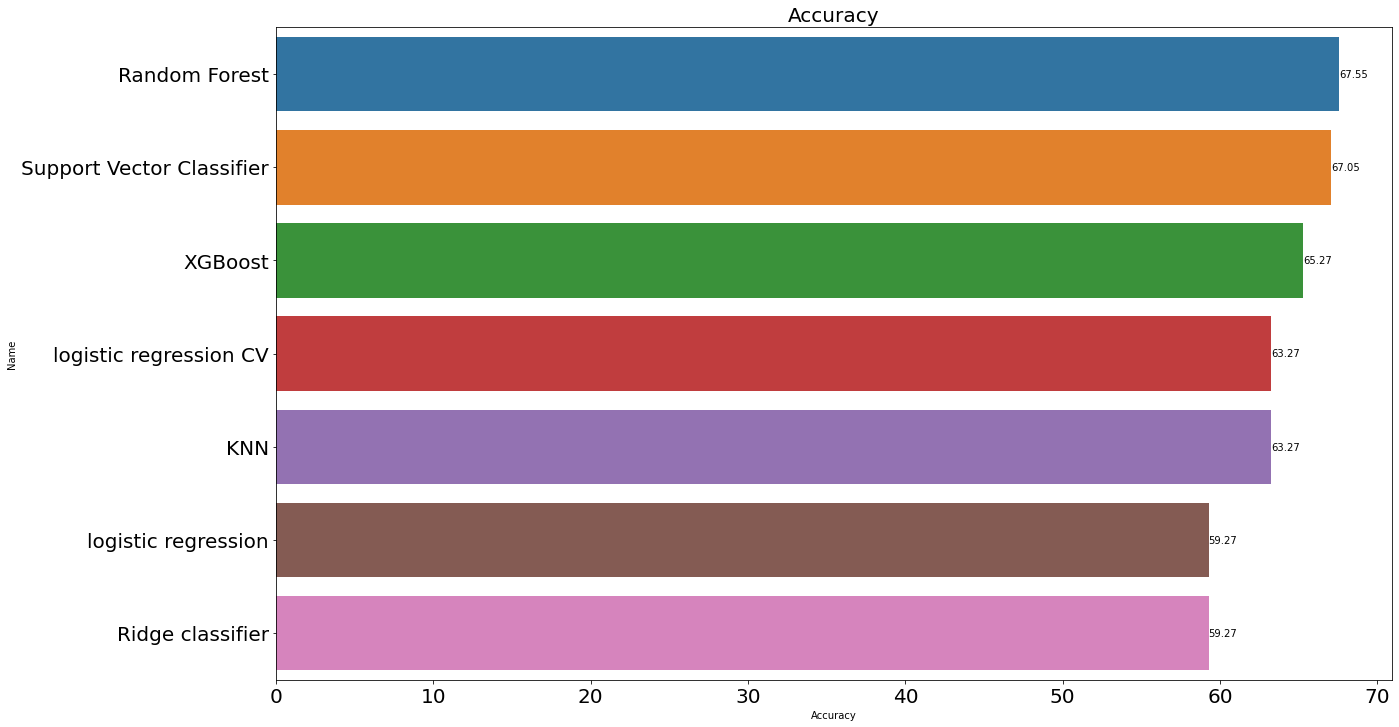

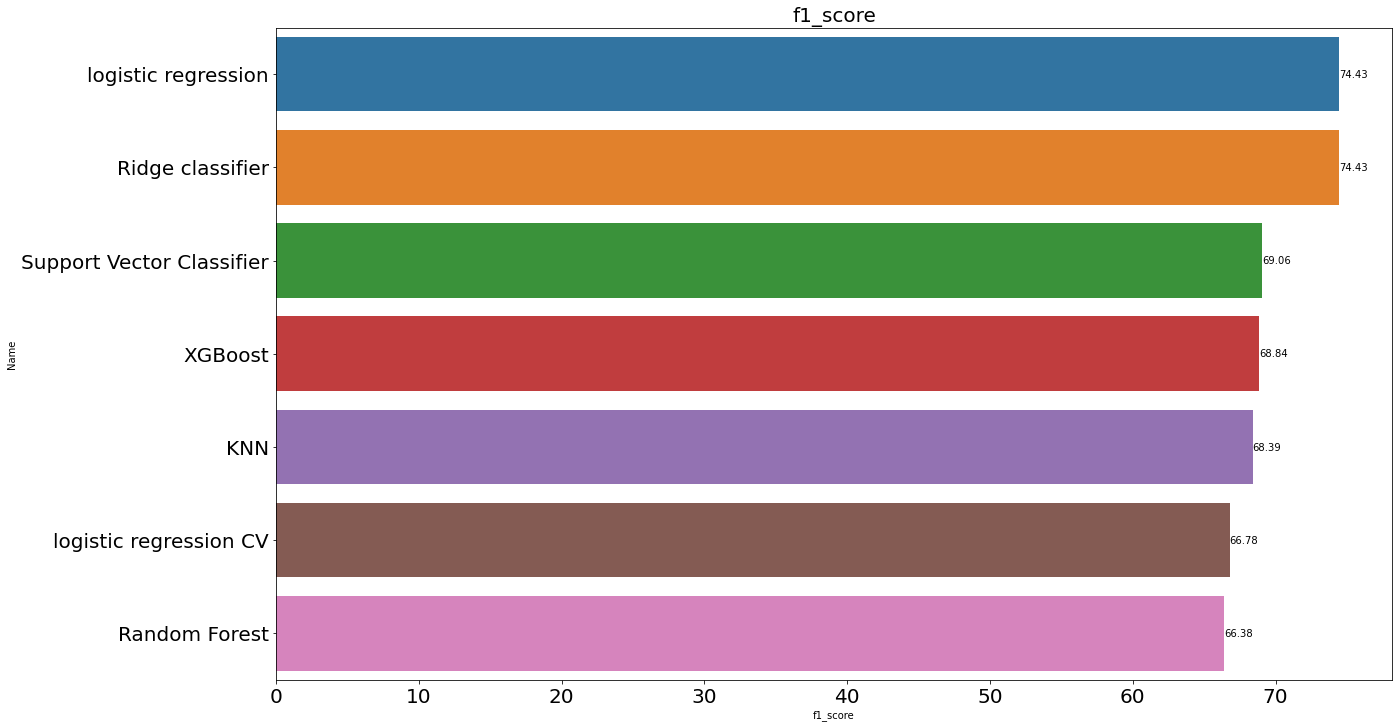

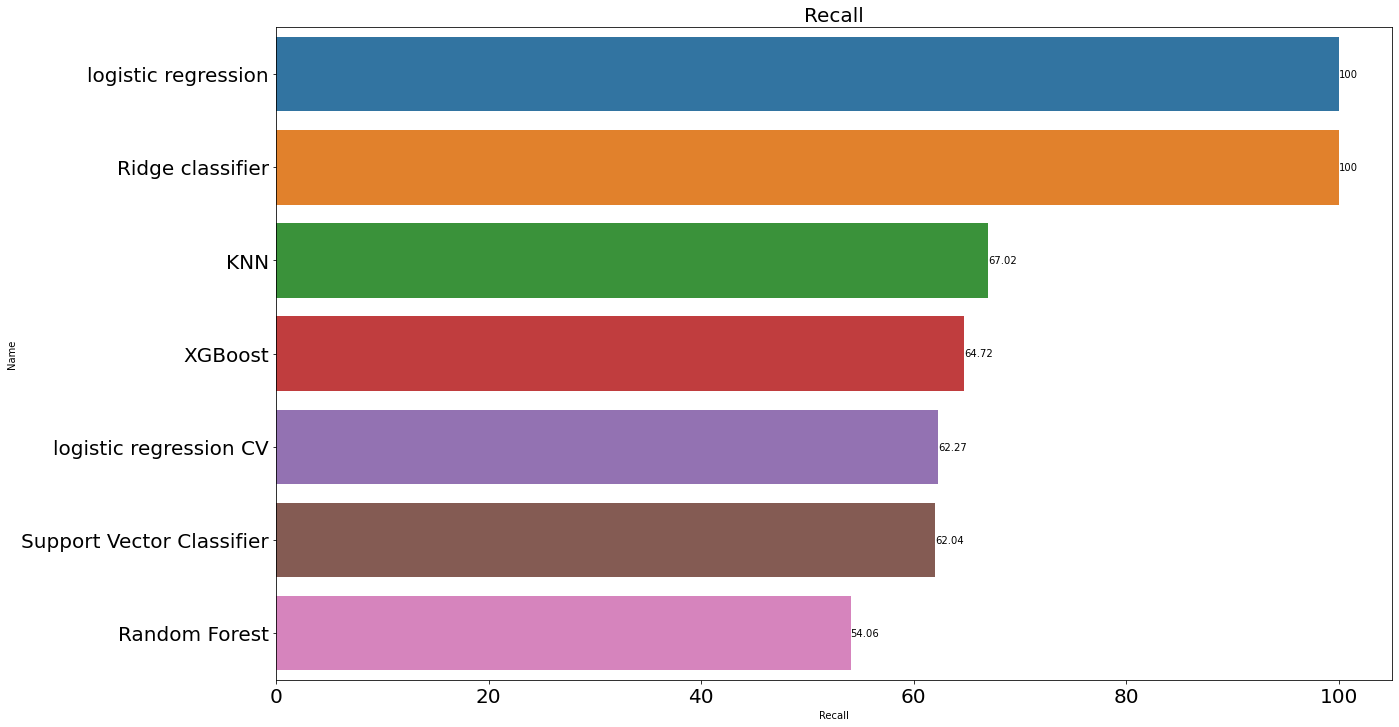

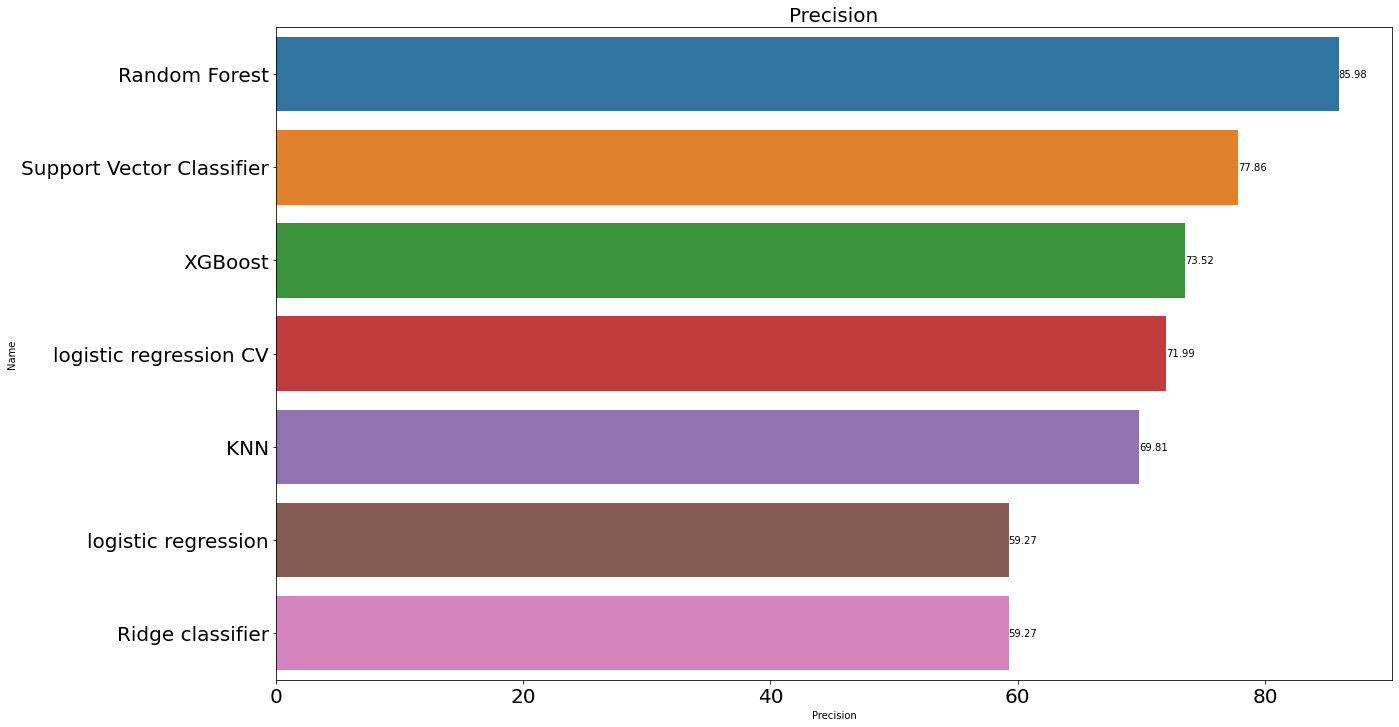

In [29]:

import matplotlib.pyplot as plt


for i in df.columns[2:]:
    plt.figure(figsize=(20, 12))
    plt.title(i,fontsize=20)
    b=sns.barplot(y='Name',x=i,data=df,order=df.sort_values(i,ascending = False).Name)
    b.tick_params(labelsize=20)
    b.bar_label(b.containers[0])
    plt.show()

# Saving model

In [56]:
import pickle as pkl

In [146]:
pkl.dump(rf, open('rf_acc_68.pkl', 'wb'))

In [57]:
pkl.dump(Data_normalizer, open('normalizer.pkl', 'wb'))

# Load model

In [147]:
model = pkl.load(open('rf_acc_68.pkl', 'rb'))

In [159]:
model.predict(x_test_normalized[0].reshape(1,-1))

array([0], dtype=int64)

# Model Testing/Inference

In [77]:
for i in x_test_normalized[:10]:
    prob=model.predict_proba(i.reshape(1,-1))[0]
    n_reach = prob[0]
    reach = prob[1]
    print(reach,n_reach)
    print('There is a {0:.2f} % chance that your product will reach in time and {0:.2f} % chance that your product will not reach in time'.format(reach*100,n_reach*100))
    
    print(model.predict(i.reshape(1,-1)))

0.49438180443075536 0.5056181955692446
There is a 49.44 % chance that your product will reach in time and 49.44 % chance that your product will not reach in time
[0]
0.5443919598499957 0.4556080401500043
There is a 54.44 % chance that your product will reach in time and 54.44 % chance that your product will not reach in time
[1]
0.42455502625677766 0.5754449737432223
There is a 42.46 % chance that your product will reach in time and 42.46 % chance that your product will not reach in time
[0]
0.9277379491906207 0.07226205080937938
There is a 92.77 % chance that your product will reach in time and 92.77 % chance that your product will not reach in time
[1]
0.4383697666669004 0.5616302333330996
There is a 43.84 % chance that your product will reach in time and 43.84 % chance that your product will not reach in time
[0]
0.4482565722328139 0.5517434277671862
There is a 44.83 % chance that your product will reach in time and 44.83 % chance that your product will not reach in time
[0]
0.44950

# Flask Code

In [31]:
import sklearn
sklearn.__version__

'1.1.2'

In [83]:
import pickle
from flask import Flask , request, render_template

app = Flask(__name__)
model = pickle.load(open("rf_acc_68.pkl","rb"))
Data_normalizer = pickle.load(open("normalizer.pkl","rb"))
@app.route('/')
def indput():
    return render_template('index.html')

@app.route('/predict',methods = ['GET','POST'])
def admin():
    Warehouse_block=eval(request.form["Warehouse_block"])
    Mode_of_Shipment=eval(request.form["Mode_of_Shipment"])
    Customer_care_calls=eval(request.form["Customer_care_calls"])
    Customer_rating=eval(request.form["Customer_rating"])
    Cost_of_the_Product = eval(request.form["Cost_of_the_Product"])
    Prior_purchases = eval(request.form["Prior_purchases"])
    Product_importance = eval(request.form["Product_importance"])
    Gender = eval(request.form["Gender"])
    Discount_offered = eval(request.form["Discount_offered"])
    Weight_in_gms = eval(request.form["Weight_in_gms"])
    
    preds=[[Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,
           Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms]]
    xx=model.predict(Data_normalizer.transform(preds))
    prob=model.predict_proba(Data_normalizer.transform(preds))[0]
    n_reach = prob[0]
    reach = prob[1]
    print('There is a {0:.2f} % chance that your product will reach in time'.format(reach*100))
    print(xx)
    return render_template("index.html",p='There is a {0:.2f} % chance that your product will reach in time'.format(reach*100))
if __name__ == '__main__':
    app.run(debug = False, port=4000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4000/ (Press CTRL+C to quit)
C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(
C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(
127.0.0.1 - - [28/Feb/2023 15:49:49] "POST /predict HTTP/1.1" 200 -


There is a 95.24 % chance that your product will reach in time
[1]


C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(
C:\Users\ashwi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(
127.0.0.1 - - [28/Feb/2023 15:50:26] "POST /predict HTTP/1.1" 200 -


There is a 89.96 % chance that your product will reach in time
[1]


# IBM Deployment Code
Should be executed on IBM cloud notebook

In [24]:
!pip install ibm_watson_machine_learning

In [40]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"_N4SZtGsywwrfdPsVUDXxJvq5sS8DTfhD7kDKmu1x0RX"
}
client = APIClient(wml_credentials)

In [41]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [42]:
space_uid = guid_from_space_name(client,'Model Deployments')
print("Space uid:  ",space_uid)

Space uid:   5414af83-b815-459c-97e8-0492828b44d4


In [43]:
client.set.default_space(space_uid)

'SUCCESS'

In [30]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----  ------------------  -------------------------------
NAME                           ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.1-py3.9
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  not_provided
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.1-py3.9
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  supported
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base  unsupported         runtime-22.1-py3.9
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base  n

In [47]:
software_spec_uid = client.software_specifications.get_uid_by_name('runtime-22.1-py3.9')
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [48]:
model_details = client.repository.store_model(model=rg, meta_props={

client.repository.ModelMetaNames.NAME: "ecom-pred",

client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",

client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid })

model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [16]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "API_KEY"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']], "values": [[0.00000000e+00, 4.60829493e-04, 2.76497696e-03, 9.21658986e-04,
       1.29032258e-01, 1.84331797e-03, 0.00000000e+00, 4.60829493e-04,
       4.60829493e-03, 8.59907834e-01]]}]}

response_scoring = requests.post('YOUR_ENDPOINT_LINK', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
response = response_scoring.json()
if response['predictions'][0]['values'][0][0]==1:
    print('Reached in time')
else:
    print('Not reached in time')

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[1]]}]}
Reached in time
